In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.cort_processor import *
from src.phase_decoder_support import *
from sklearn import metrics
import scipy
from scipy import integrate
from matplotlib import colors
from src.phase_decoder_support import *
import matplotlib.collections as mcoll
import matplotlib.path as mpath
from sklearn.metrics import r2_score
from matplotlib.patches import Rectangle

from scipy.stats import pearsonr
import seaborn as sns

In [2]:
# with open('/mnt/c/oobootoo/rat-fes/data/pickles/3-meepo919__session.pkl', 'rb') as inp:
#     mep919_session = pickle.load(inp)
# mep919_rates = mep919_session.data['rates']
# mep919_angles = mep919_session.data['angles']
# mep919_coords = mep919_session.data['coords']

In [3]:
rollie32 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/test/rollie/0203-full')
rollie32.process()

read from t=0s to t=408.64s
read from t=0s to t=252.75s


(array([[180., 100., 220., ..., 140., 140., 100.],
        [220., 180., 180., ..., 200., 140., 200.],
        [140., 220., 100., ..., 180., 120., 200.],
        ...,
        [160., 120., 100., ..., 160., 120., 240.],
        [ 20., 160., 140., ..., 140., 180., 220.],
        [ 80.,  80.,  80., ...,  40., 100.,  80.]]),
 array([[ 24.75230494,  67.45695954,  99.11252442, ...,  55.21260268,
          70.95531163, 140.0708985 ],
        [ 18.0551122 ,  57.27813615,  97.6894775 , ...,  58.11853402,
          68.98631647, 139.6072406 ],
        [ 20.89648394,  61.46768585,  99.86372521, ...,  62.82476651,
          67.65432604, 128.10286187],
        ...,
        [ 45.56338561,  76.55500071,  82.44782612, ...,  51.42738538,
          78.0347134 , 143.18009052],
        [ 41.86804303,  72.80972743,  84.9706235 , ...,  54.25060384,
          77.68343017, 138.83454953],
        [ 45.8810283 ,  73.8066047 ,  88.17259619, ...,  50.81613149,
          73.01684151, 133.07064589]]),
 array([1., 0., 

In [19]:
rollie32.data

{'bodyparts': ['toe',
  'MTP',
  'ankle',
  'knee',
  'pelvis bottom',
  'hip',
  'pelvis top',
  'finger',
  'knuckle',
  'wrist',
  'elbow',
  'shoulder',
  'scapula',
  'x1',
  'x2',
  'y1',
  'y2'],
 'angle_names': ['ankle',
  'knee',
  'hip',
  'limbfoot',
  'elbow',
  'shoulder',
  'forelimb'],
 'rates': [array([[180., 100., 220., ..., 140., 140., 100.],
         [220., 180., 180., ..., 200., 140., 200.],
         [140., 220., 100., ..., 180., 120., 200.],
         ...,
         [ 40., 100.,  60., ...,  20.,  20.,  40.],
         [100., 120., 100., ...,  60., 140., 120.],
         [ 40.,  80., 140., ...,  20.,  80., 100.]]),
  array([[120., 260., 160., ..., 220., 280., 180.],
         [260., 200., 260., ..., 280., 300., 220.],
         [180., 260., 160., ..., 180., 300., 260.],
         ...,
         [160., 120., 100., ..., 160., 120., 240.],
         [ 20., 160., 140., ..., 140., 180., 220.],
         [ 80.,  80.,  80., ...,  40., 100.,  80.]])],
 'coords': [array([[[ 1.99714170

In [14]:
score2, h_sin, h_cos, predicted_arctans, test_arctans, _, swing_mean, _, _, _, _, _ = rollie32.phase_train(upper_limit = 1.2, lower_limit = 0.5)

# show_comparison(vaf1, test_angle_angle, test_angle_rates, h_angle1)
# ts = np.linspace(0, (test_arctans.shape[0]*50)/1000,test_arctans.shape[0])
# fig, ax = plt.subplots(1,1, figsize=(6,6), sharey=False)
# ax.plot(ts, test2, color = 'k', alpha = 0.25, label = 'actual phase')
# ax.plot(ts, pred1, color = 'r', linestyle = '--', alpha = 0.5, label='unrestricted training set')
# ax.plot(ts, pred2, color = 'r', alpha = 0.5, label = 'excluding abnormal gaits')
# ax.set_ylabel('phase degree')
# ax.legend(loc='lower right')
# ax.set_xlabel('time (s)')
# ax.set_title("Pearson R = {0:.4f} -> {1:.4f}".format(pearR1, pearR2))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
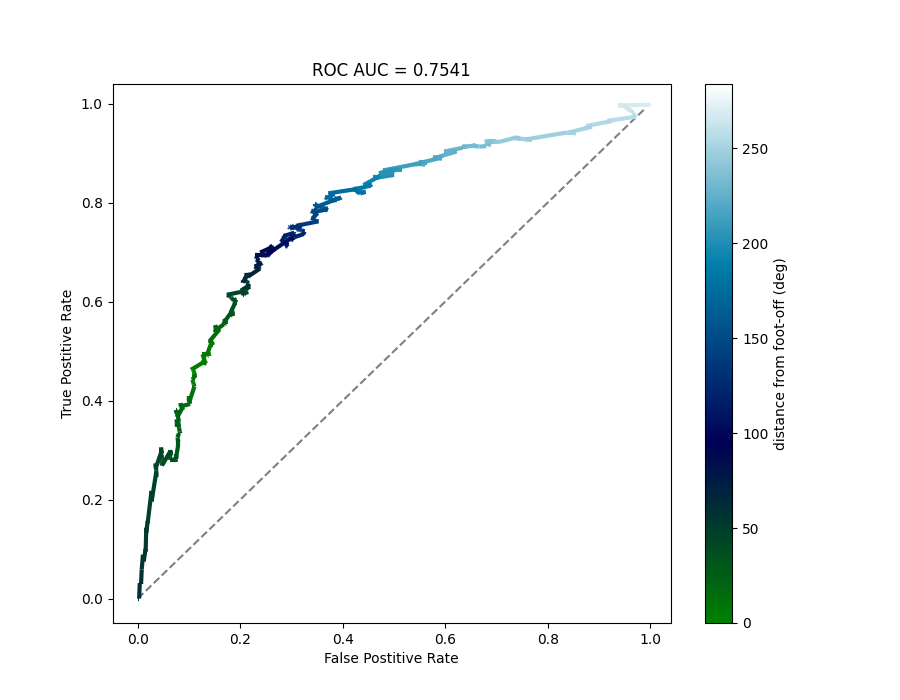

In [17]:
_, _, _, _, AUC_swing, ACC_swing = fascilli_roc(test_arctans, predicted_arctans, swing_mean, display_score=score2[0],plotting = True)
# _, _, _, _, AUC_180, ACC_180 = fascilli_roc(test_arctans, predicted_arctans, 180, plotting = False)

In [9]:
print(ACC_swing, ACC_180)

0.8043217286914766 0.7142857142857143


In [10]:
print(score)

[0.75408772 0.76915314]


In [12]:
print(score2)

[0.75408772 0.70297783]


In [7]:
def gridsearch():    
    _, _, _, _, _, _, _, _, _, _, _, index1 = rollie32.phase_train(upper_limit = 3.1, lower_limit = 1)
    upper_bounds = np.arange(0,3.2, 0.1)
    lower_bounds = np.arange(0,1.1, 0.1)
    basis = 0
    UL = 0
    LL = 0
    sideways=[]
    for i in range(upper_bounds.shape[0]):
        longways = []
        for j in range(lower_bounds.shape[0]):
            print(upper_bounds[i], lower_bounds[j])
            _, _, _, predicted_arctans, test_arctans, _, swing_mean = rollie32.exclusion_train(upper_limit = upper_bounds[i], lower_limit = lower_bounds[j], exclusion_index=index1)
            _,_,_,_, AUC, _ = fascilli_roc(test_arctans, predicted_arctans, swing_mean, plotting = False)
            if AUC > basis:
                UL = upper_bounds[i]
                LL = lower_bounds[j]
                basis = AUC
            longways.append(AUC)
        sideways.insert(0,longways)
    # upper_bounds2 = np.arange(UL-0.1,UL+0.1, 0.02)
    # lower_bounds2 = np.arange(LL-0.05,LL+0.05, 0.01)
    # for i in range(upper_bounds2.shape[0]):
    #     for j in range(lower_bounds2.shape[0]):
    #         _, _, _, predicted_arctans, test_arctans, _, swing_mean, _, _, _, _ = rollie32.phase_train(upper_limit = upper_bounds2[i], lower_limit = lower_bounds2[j])
    #         _,_,_,_, AUC = fascilli_roc(test_arctans, predicted_arctans, swing_mean, plotting = False)
    #         if AUC > basis:
    #             UL = upper_bounds2[i]
    #             LL = lower_bounds2[j]
    #             basis = AUC
    # _, _, _, predicted_arctans, test_arctans, _, _, _, _, _, _, _, _ = rollie32.phase_train(upper_limit = UL, lower_limit = LL, forcible_test_phase=forcible_test_phase, forcible_test_rates=forcible_test_rates)
    # _,_,_,_, AUC = fascilli_roc(test_arctans, predicted_arctans, swing_mean, plotting = True)
    # show_comparison(vaf_array, test_angle_angle, test_angle_rates, h_angle)
    return UL, LL, np.array(sideways)


In [8]:
UL, LL, sideways = gridsearch()

0.0 0.0
0.0 0.1
0.0 0.2
0.0 0.30000000000000004
0.0 0.4
0.0 0.5
0.0 0.6000000000000001
0.0 0.7000000000000001
0.0 0.8
0.0 0.9
0.0 1.0
0.1 0.0
0.1 0.1
0.1 0.2
0.1 0.30000000000000004
0.1 0.4
0.1 0.5
0.1 0.6000000000000001
0.1 0.7000000000000001
0.1 0.8
0.1 0.9
0.1 1.0
0.2 0.0
0.2 0.1
0.2 0.2
0.2 0.30000000000000004
0.2 0.4
0.2 0.5
0.2 0.6000000000000001
0.2 0.7000000000000001
0.2 0.8
0.2 0.9
0.2 1.0
0.30000000000000004 0.0
0.30000000000000004 0.1
0.30000000000000004 0.2
0.30000000000000004 0.30000000000000004
0.30000000000000004 0.4
0.30000000000000004 0.5
0.30000000000000004 0.6000000000000001
0.30000000000000004 0.7000000000000001
0.30000000000000004 0.8
0.30000000000000004 0.9
0.30000000000000004 1.0
0.4 0.0
0.4 0.1
0.4 0.2
0.4 0.30000000000000004
0.4 0.4
0.4 0.5
0.4 0.6000000000000001
0.4 0.7000000000000001
0.4 0.8
0.4 0.9
0.4 1.0
0.5 0.0
0.5 0.1
0.5 0.2
0.5 0.30000000000000004
0.5 0.4
0.5 0.5
0.5 0.6000000000000001
0.5 0.7000000000000001
0.5 0.8
0.5 0.9
0.5 1.0
0.6000000000000001 0

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
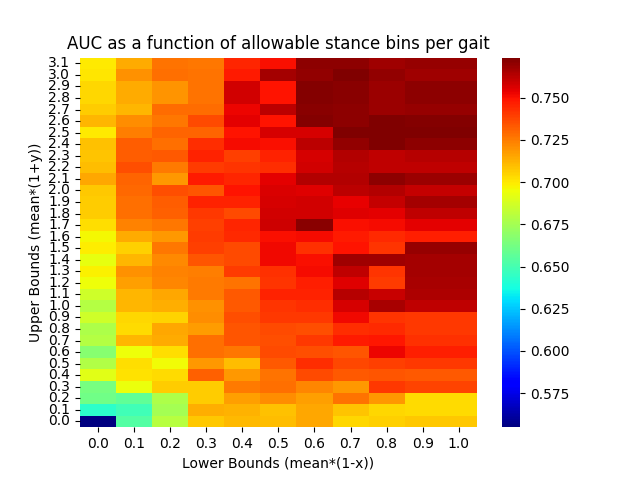

In [15]:
ax3 = sns.heatmap(sideways, cmap='jet', xticklabels= np.around(np.arange(0,1.1, 0.1), 2), yticklabels= np.around(np.arange(3.10000001,-0.1, -0.1)[:-1],1))
# ax3.add_patch(Rectangle((7, 11), 1, 1, fill=False, edgecolor='k', lw=2, clip_on=False))
# ax3.add_patch(Rectangle((10, 0), 1, 1, fill=False, edgecolor='k', linestyle = '--', lw=2, clip_on=False))
plt.ylabel('Upper Bounds (mean*(1+y))')
plt.xlabel('Lower Bounds (mean*(1-x))')
plt.title('AUC as a function of allowable stance bins per gait') 
plt.show()

In [11]:
print(UL, LL)

2.5 0.8


In [14]:
plt.clf()

In [34]:
score1, _, _, _, _, _, _, _, _, _, _, index1 = rollie32.phase_train(upper_limit = 3.1, lower_limit = 1)
upper_bounds = np.arange(0,3.2, 0.1)
lower_bounds = np.arange(0,1.1, 0.1)
UL = 1.2
LL = .5
score2, _, _, predicted_arctans, test_arctans, _, swing_mean = rollie32.exclusion_train(upper_limit = UL, lower_limit = LL, exclusion_index=index1)


In [35]:
print(score1, score2)

[0.73536433 0.75793503] [0.75105508 0.76621678]


In [27]:
print(predicted_arctans)

[199.61490832 223.6261744  237.93863853 ... 287.1902695  309.102963
 284.04290751]


In [28]:
print(test_arctans)

[ 13.84615385  27.69230769  41.53846154 ... 325.16129032 336.77419355
 348.38709677]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
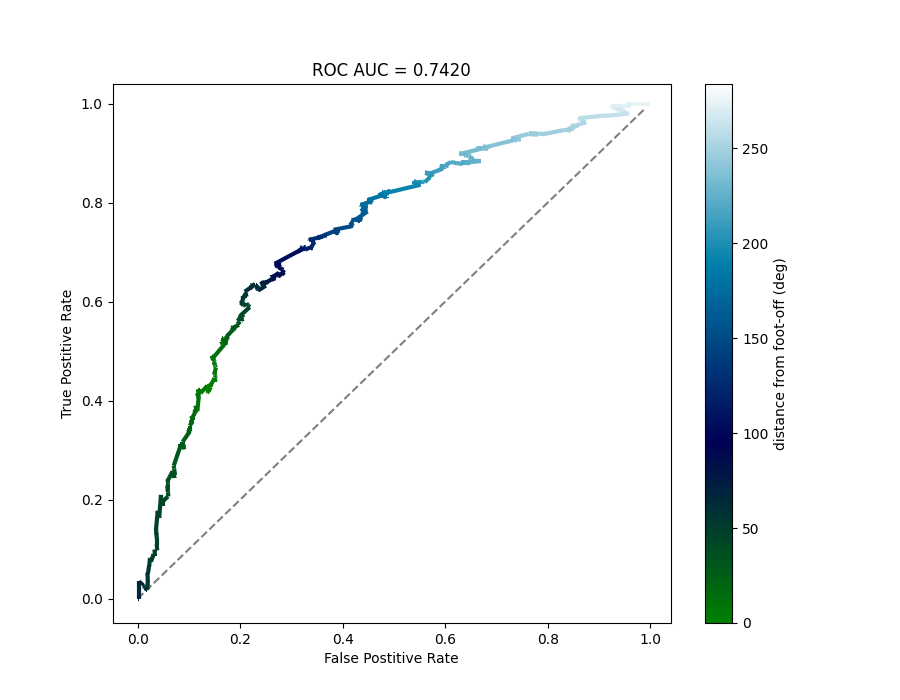

In [30]:
_,_,_,_, AUC, acc = fascilli_roc(test_arctans, predicted_arctans, swing_mean, plotting = True)


In [31]:
print(acc)

0.7851373182552503


(array([1., 1., 1., ..., 0., 0., 0.]),
 array([1.        , 1.        , 1.        , ..., 0.00199203, 0.00199203,
        0.        ]),
 array([1.        , 0.99962589, 0.99925178, ..., 0.28140668, 0.28178079,
        0.34575386]),
 267.33999720021086,
 0.733649503078704)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
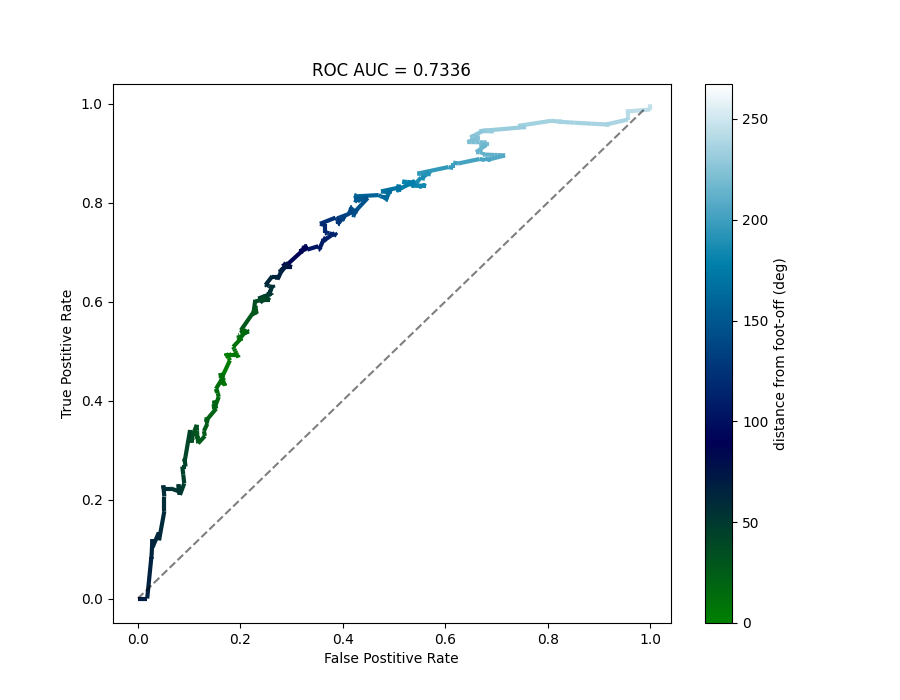

In [234]:
# pearR1, _, _, pred1, test1, rates1, _, vaf1, h_angle1, test_angle_rates, test_angle_angle, = rollie32.phase_train(upper_limit = 4, lower_limit = 1)
pearR2, h_sin, h_cos, pred2, test2, test_rates, swing_mean, vaf2, h_angle2, _,_ = rollie32.phase_train(upper_limit = 1.2, lower_limit = .5)
# roc_echo(test1, pred1, test2, pred2, swing_mean)
fascilli_roc(test2, pred2, swing_mean, plotting = True)


In [212]:
test1.shape

(833,)

In [213]:
test2.shape

(300,)

In [174]:
plt.clf()

In [67]:
print(LL)
print(UL)

0.0
1.7000000000000002


Text(0.5, 1.0, 'Pearson R = 0.3702 -> 0.4878')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
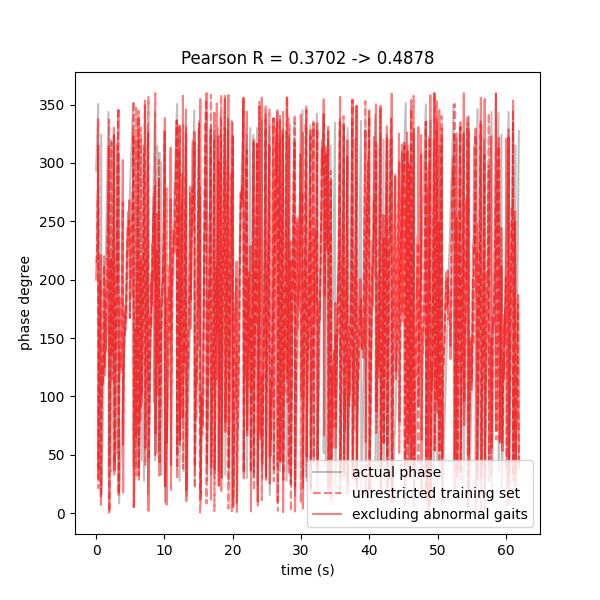

In [133]:
# hind1 = test_wiener_filter(test_angle_rates, h_angle1[:,3])
# hind2 = test_wiener_filter(test_angle_rates, h_angle2[:,3])
# hindt = test_angle_angle[:,3]
# tsa = np.linspace(0, (hindt.shape[0]*50)/1000,hindt.shape[0])

ts = np.linspace(0, (test_arctans.shape[0]*50)/1000,test_arctans.shape[0])
fig, ax = plt.subplots(1,1, figsize=(6,6), sharey=False)
ax.plot(ts, test2, color = 'k', alpha = 0.25, label = 'actual phase')
ax.plot(ts, pred1, color = 'r', linestyle = '--', alpha = 0.5, label='unrestricted training set')
ax.plot(ts, pred2, color = 'r', alpha = 0.5, label = 'excluding abnormal gaits')
ax.set_ylabel('phase degree')
ax.legend(loc='lower right')
ax.set_xlabel('time (s)')
ax.set_title("Pearson R = {0:.4f} -> {1:.4f}".format(pearR1, pearR2))
# ax[1].plot(tsa, hindt, color = 'k', alpha = 0.25, label = 'actual phase')
# ax[1].plot(tsa, hind1, color = 'b', linestyle = '--', label='unrestricted training set')
# ax[1].plot(tsa, hind2, color = 'b', alpha = 0.5, label = 'excluding abnormal gaits')
# ax[1].set_ylabel('limbfoot degree')
# ax[1].legend(loc='lower right')
# ax[1].set_xlabel('time (s)')
# ax[1].set_title("VAF = {0:.4f} -> {1:.4f}".format(vaf1[3], vaf2[3]))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
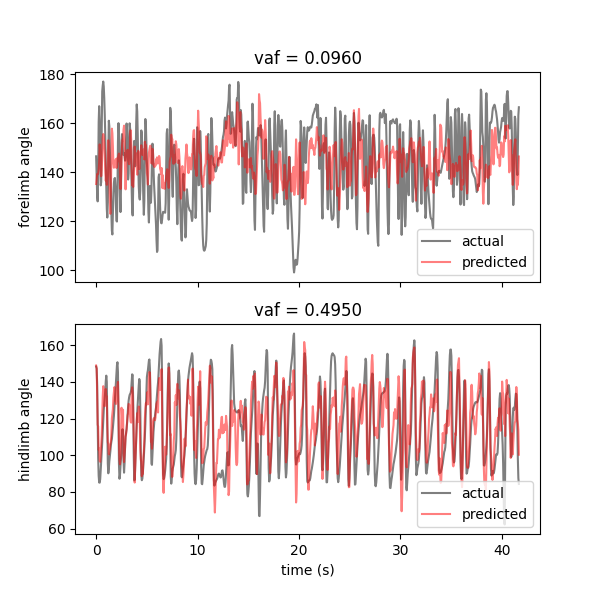